<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#helper" data-toc-modified-id="helper-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>helper</a></span></li><li><span><a href="#merge-lines" data-toc-modified-id="merge-lines-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>merge lines</a></span></li><li><span><a href="#houghtransform" data-toc-modified-id="houghtransform-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>houghtransform</a></span><ul class="toc-item"><li><span><a href="#find-close-lines" data-toc-modified-id="find-close-lines-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>find close lines</a></span></li><li><span><a href="#extrapolate-lines" data-toc-modified-id="extrapolate-lines-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>extrapolate lines</a></span></li><li><span><a href="#cut-lines" data-toc-modified-id="cut-lines-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>cut lines</a></span></li><li><span><a href="#show-lines" data-toc-modified-id="show-lines-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>show lines</a></span></li><li><span><a href="#draw-lines" data-toc-modified-id="draw-lines-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>draw lines</a></span></li></ul></li><li><span><a href="#start" data-toc-modified-id="start-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>start</a></span><ul class="toc-item"><li><span><a href="#threshold" data-toc-modified-id="threshold-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>threshold</a></span><ul class="toc-item"><li><span><a href="#sobel-operator" data-toc-modified-id="sobel-operator-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>sobel operator</a></span></li><li><span><a href="#canny-no-parameter" data-toc-modified-id="canny-no-parameter-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>canny no parameter</a></span></li><li><span><a href="#HSL" data-toc-modified-id="HSL-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>HSL</a></span></li></ul></li><li><span><a href="#combine-filter-and-show-steps" data-toc-modified-id="combine-filter-and-show-steps-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>combine filter and show steps</a></span></li><li><span><a href="#k-means---image-segmentation" data-toc-modified-id="k-means---image-segmentation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>k means - image segmentation</a></span></li><li><span><a href="#final" data-toc-modified-id="final-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>final</a></span></li><li><span><a href="#evaluate-result" data-toc-modified-id="evaluate-result-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>evaluate result</a></span></li><li><span><a href="#make-videos" data-toc-modified-id="make-videos-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>make videos</a></span></li><li><span><a href="#evulation" data-toc-modified-id="evulation-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>evulation</a></span></li><li><span><a href="#trial" data-toc-modified-id="trial-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>trial</a></span></li><li><span><a href="#normal-houghtransform" data-toc-modified-id="normal-houghtransform-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>normal houghtransform</a></span></li></ul></li></ul></div>

# Lane detection


# import

In [84]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [85]:
import numpy as np
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import math

In [86]:
def get_slope_intecept(lines):
    y2 = lines[:, 3]
    y1 = lines[:, 1]
    x2 = lines[:, 2]
    x1 = lines[:, 0]
    
    slopes = (y2 - y1) / (x2 - x1 + 0.001) # y2 - y1 / x2 - x1
    intercepts = y2 - slopes*x2 #((y2 + y1) - slopes * (x2 + x1)) / 2
    #print(intercepts)
    return slopes, intercepts

# helper

In [87]:
def plot_one_img(img):
    tmp = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(tmp)
    plt.show()
    
def display_two(img1, img2, t1="", t2=""):
    
    fig, axes = plt.subplots(ncols=2, figsize=(20, 15), sharex=True, sharey=True)
    ax = axes.ravel()

    img1 = cv2.cvtColor(img1, cv.COLOR_BGR2RGB)
    ax[0].imshow(img1, cmap=plt.cm.gray)
    ax[0].set_title(t1)
    ax[1].imshow(img2, cmap=plt.cm.gray)
    ax[1].set_title(t2)

def display_three(img1, img2, img3, t1="", t2="", t3=""):
    
    fig, axes = plt.subplots(ncols=3, figsize=(20, 15), sharex=True, sharey=True)
    ax = axes.ravel()

    img2 = cv2.cvtColor(img2, cv.COLOR_BGR2RGB)
    ax[0].imshow(img1, cmap=plt.cm.gray)
    ax[0].set_title(t1)
    ax[1].imshow(img2, cmap=plt.cm.gray)
    ax[1].set_title(t2)
    ax[2].imshow(img3, cmap=plt.cm.gray)
    ax[2].set_title(t3)
    
def display_expected(nth_img, nth_data_h_smaples, nth_data_lanes):

    gt_lanes = [[(x, y) for (x, y) in zip(lane, nth_data_h_smaples) if x>=0]  for lane in nth_data_lanes]

    img_plot = nth_img.copy()
    for lane in gt_lanes:
        cv.polylines(img_plot, np.int32([lane]), isClosed=False, color=(0,255,0), thickness=5)  #draw lines
    return img_plot

In [88]:
y_sky = 330
y_max = 720

# merge lines

In [89]:
def merge_lane_lines(lines, slope_similarity_threshold=0.1, intercept_similarity_threshold=40, min_slope_threshold=0.3, max_slope_threshold=5):
    """
    Merges lane lines to output a single line per lane, using the slope and intercept as similarity measures.
    Also, filters horizontal lane lines based on a minimum slope threshold.

    Arguments:
    lines -- tensor of dimension (N, 4) containing lines in the form of [x_1, y_1, x_2, y_2],
    the coordinates of two points on the line.

    Returns:
    merged_lines -- tensor of dimension (N, 4) containing lines in the form of [x_1, y_1, x_2, y_2],
    the coordinates of two points on the line.
    """
    # Step 0: Define thresholds
    
    clusters = []
    current_inds = []
    itr = 0
    
    # Step 1: Get slope and intercept of lines
    slopes, intercepts = get_slope_intecept(lines)
    
    # Step 2: Determine lines with slope less than horizontal slope threshold.
    slopes_horizontal = np.abs(slopes) > min_slope_threshold
    slopes_vertical = np.abs(slopes) < max_slope_threshold
    
    # Step 3: Iterate over all remaining slopes and intercepts and cluster lines that are close to each other using a slope and intercept threshold.
    for slope, intercept in zip(slopes, intercepts):
        in_clusters = np.array([itr in current for current in current_inds])
        if not in_clusters.any():
            slope_cluster = np.logical_and(slopes < (slope+slope_similarity_threshold), slopes > (slope-slope_similarity_threshold))
            intercept_cluster = np.logical_and(intercepts < (intercept+intercept_similarity_threshold), intercepts > (intercept-intercept_similarity_threshold))
            inds = np.argwhere(slope_cluster & intercept_cluster & slopes_horizontal & slopes_vertical).T
            if inds.size:
                current_inds.append(inds.flatten())
                clusters.append(lines[inds])
        itr += 1
        
    # Step 4: Merge all lines in clusters using mean averaging
    merged_lines = [np.mean(cluster, axis=1) for cluster in clusters]
    merged_lines = np.array(merged_lines).reshape((-1, 4))
    
    return merged_lines

# houghtransform

## find close lines

In [90]:
def find_closest_lines(lines, point):
    x0, y0 = point
    distances = []
    
    for line in lines:
        
        x1, y1, x2, y2 = line[0], line[1], line[2], line[3]

        distances.append(((x2 - x1) * (y1 - y0) - (x1 - x0) *
                          (y2 - y1)) / (np.sqrt((y2 - y1)**2 + (x2 - x1)**2)))
    
    distances = np.abs(np.array(distances))
#     print(distances[distances.argmin()])
    thesh = 200
    if distances[distances.argmin()] < thesh: # point to lines distance threshold
        res = lines[distances.argmin()]
    else:
        return np.array([])
        
    return res

## extrapolate lines

In [91]:
def extrapolate_lines(lines, y_min, y_max):
    slopes, intercepts = get_slope_intecept(lines)

    new_lines = []

    for slope, intercept, in zip(slopes, intercepts):
        x1 = (y_min - intercept) / (slope + 0.0001)
        x2 = (y_max - intercept) / (slope + 0.0001)
           
        # filter lines
        if x2 < 20 or x2 > 1200: # line in wrong direction, too far left / right
            continue
        if (x1 < 600 and x2 < 100) or  (x1 > 600 and x2 > 1200): # distorted line
            continue
        
        # filter left lane too left / right too right
        if (x1 < 300 and x2 < 300) or  (x1 > 900 and x2 > 900): # distorted line
            continue
        
        # not side lane but inner two ones
        slopes = (y_max - y_min) / (x2 - x1 + 0.001)
        y_intercept =  y_max - slopes*x2
        y2_intercept = slopes * 1280 + y_intercept
        
        if  (y_intercept > 550 and x1 < 400) or  (y2_intercept > 550 and x1 > 800): # differentiate based on intercept with left and right bound
            
            dist = abs(x2 - x1)
            if x1 < 0 :
                dist = x2
            if x1 > 1280:
                dist = 1280 - x2
            if (x1 > 1030 or x1 < 70) and (abs(x2 - x1) < 350 or dist > 830): # inner lane too short / long
                continue
            if (abs(x2 - x1) < 250) and (x1 > 800 or x1 < 400): # filter short lines - 220 px
                continue
        new_lines.append([x1, y_min, x2, y_max])

    return np.array(new_lines)

## cut lines

In [92]:
def line_y_intersection(lines):
    '''
    get y intercept between inner most two lines
    '''

    points_list = [np.array([300, 720]), np.array([1100, 720])]
    tmp = []
    for p in points_list:            
        l = find_closest_lines(lines, p)
        tmp.append(l)
    
    try:
        
        line1 = tmp[0]
        line2 = tmp[1]
        
        line1 = ((line1[0], line1[1]), (line1[2], line1[3]))
        line2 = ((line2[0], line2[1]), (line2[2], line2[3]))
        xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
        ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

        def det(a, b):
            return a[0] * b[1] - a[1] * b[0]

        div = det(xdiff, ydiff)
        if div == 0:
           raise Exception('lines do not intersect')

        d = (det(*line1), det(*line2))
        x = det(d, xdiff) / div
        y = det(d, ydiff) / div
        return y + 70
    
    except:
        return 350

In [93]:
def cut_lines(lines, y_cut):
    
    tmp = []
    for l in lines:
        tmp.append(l)
    lines = np.array(tmp)
    slopes, intercepts = get_slope_intecept(lines)
    
    i = 0
    
    for slope, intercept in zip(slopes, intercepts):
        
        try:
            lines[i][3] = y_cut # cut y2 to 400
            lines[i][2] = (y_cut - intercept) / slope # sub y2 into line equal=tion to get x2
            
        except:
            print(1)
            pass
        i += 1
    return lines

## show lines

In [94]:
def display_lines(lines, w=1280, h=720):
    
    for i in range(len(lines)):
        
        x1 = lines[i][0]
        y1 = lines[i][1]    
        x2 = lines[i][2]
        y2 = lines[i][3]  

        slopes = (y2 - y1) / (x2 - x1 + 0.0001)  


        m = (float(y2-y1))/float((x2-x1) + 0.0001)
        dist = math.sqrt((y1 -y2)**2 + (x1 - x2)**2)
        angle = abs(math.degrees(math.atan(m)))

        #print(angle)
        #print(dist)
        #print()
        #print(slopes)
        if abs(m) > 0:
            xs = [x1,x2]
            ys = [y1,y2]
            plt.plot(xs,ys, 'r-')

        plt.xlim(0, w)
        plt.ylim(h, 0)
    plt.show()

In [95]:
def filter_short_line(lines):
    tmp = []
    for i in range(len(lines)):
        
        x1 = lines[i][0]
        y1 = lines[i][1]    
        x2 = lines[i][2]
        y2 = lines[i][3]  

        slopes = (y2 - y1) / (x2 - x1 + 0.0001)  

        m = (float(y2-y1))/float((x2-x1) + 0.0001)
        
        angle = abs(math.degrees(math.atan(m)))

        y_intercept = ((y2 + y1) - slopes * (x2 + x1)) / 2
        print(y_intercept)
        x_intercept = - y_intercept / m
        
        dist = math.sqrt((y_intercept)**2 + (x_intercept)**2)
        if dist > 900:
            tmp.append(lines[i])
            #print(dist)
    return tmp

In [96]:
# #
# # Hough Transform
# rho = 2 # distance resolution in pixels of the Hough grid
# theta = 1 * np.pi/180 # angular resolution in radians of the Hough grid
# threshold = 15     # minimum number of votes (intersections in Hough grid cell)
# min_line_length = 10 #minimum number of pixels making up a line
# max_line_gap = 20    # maximum gap in pixels between connectable line segments
# #
def show_lines(canny_lines, is_merged=True, minL=10, maxG=30, is_final=False, is_demo=True, is_plot=False, thres=30):
    
    if is_merged:
        
        lines = cv.HoughLinesP(canny_lines,rho=1,theta=np.pi/180, threshold =30,minLineLength=10,maxLineGap=30)
        
        lines = lines.reshape(lines.shape[0], lines.shape[1] * lines.shape[2]) # (row , corresponding grayscale
        lines = merge_lane_lines(lines, intercept_similarity_threshold=100, slope_similarity_threshold=0.4, min_slope_threshold=0.15) # 0.3
        if is_demo:
            print("after merged")
            display_lines(lines)
        y_sky = 200
        lines = extrapolate_lines(lines, y_max, y_sky)
        if is_demo:
            print("after extrapolate")
            display_lines(lines)
        
        points_list = [np.array([200, 720]), np.array([1100, 720]), np.array([0, 500]), np.array([1280, 500])]
        
        
        tmp = []
        
        for p in points_list:            
            l = find_closest_lines(lines, p)
#             for t in tmp:
#                 if (l == t).all():
#                     l = find_closest_lines(lines, p, is_next=True)
            if not l.any():
                continue
            tmp.append(l)
        lines = tmp
        if is_demo:
            print("afer close line")
            display_lines(lines)
        
        lines = cut_lines(lines, y_cut=line_y_intersection(lines))
        #
        lines = merge_lane_lines(np.array(lines), intercept_similarity_threshold=100, slope_similarity_threshold=0.3, min_slope_threshold=0.15) # 0.3
        lines = [list(l) for l in lines]
        #
    else:
        lines = cv.HoughLinesP(canny_lines,rho=1,theta=np.pi/180, threshold =thres,minLineLength=minL,maxLineGap =maxG)
    
        lines = lines.reshape(lines.shape[0], lines.shape[1] * lines.shape[2]) # (row , corresponding grayscale
        
    if is_plot:
        for i in range(len(lines)):

            x1 = lines[i][0]
            y1 = lines[i][1]    
            x2 = lines[i][2]
            y2 = lines[i][3]  
            slopes = (y2 - y1) / (x2 - x1 + 0.0001)  


            m = (float(y2-y1))/float((x2-x1) + 0.0001)
            dist = math.sqrt((y1 -y2)**2 + (x1 - x2)**2)
            angle = abs(math.degrees(math.atan(m)))

            #print(angle)
            #print(dist)
            #print()
            #print(slopes)
            if abs(m) > 0:
                xs = [x1,x2]
                ys = [y1,y2]
                plt.plot(xs,ys, 'r-')

#         plt.xlim(0, w)
#         plt.ylim(h, 0)
        plt.show()        
        
    return np.array(lines)


## draw lines

In [97]:
def draw_lines(img, lines):   # Draw the right and left lines on image
    lines_output = lines.astype(int)
    output = img.copy()

    for l in lines_output:
        x1, y1, x2, y2 = l
        cv.line(output, (x1, y1), (x2, y2), (0,255, 0), thickness=5)
        
#     plt.imshow(output)
    return output

# start

## threshold

### sobel operator

In [98]:
def abs_sobel_thresh(img, orient='x', thresh=(0,255)):
    # Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv.Sobel(gray, cv.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv.Sobel(gray, cv.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output

# gray = cv.imread("my_img/no_lane.png", 1)

# gradx_thresh = [15,255]
# gradx = abs_sobel_thresh(gray,orient='y',thresh = gradx_thresh)

# plt.imshow(gradx, cmap='gray')

### canny no parameter

In [99]:
# https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/

def canny_no_parameter(img_canny):
    gray_image = cv.cvtColor(img_canny, cv.COLOR_RGB2GRAY)

    gray_image = cv.GaussianBlur(gray_image, (5,5), 0) # signma = 0

    v = np.median(gray_image)
    
    #---- Apply automatic Canny edge detection using the computed median----
    sigma = 0.5
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv.Canny(gray_image, lower, upper)
    edged = cv.GaussianBlur(edged, (3,3), 0) # signma = 0
    thresh = 20
    edged[edged > thresh] = 255
    edged[edged < thresh] = 0
    edged[edged==255] = 1
    return edged

# gray = cv.imread("my_img/no_lane.png", 1)
# #gray = cv.imread("test_lane.jpg", 1)

# c = canny_no_parameter(gray)

# plt.imshow(c, cmap='gray')

### HSL

In [100]:
def hls_select(img, sthresh=(0, 255),lthresh=()):
    # 1) Convert to HLS color space
    hls_img = cv.cvtColor(img, cv.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    L = hls_img[:,:,1]
    S = hls_img[:,:,2]
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(S)
    binary_output[(S >= sthresh[0]) & (S <= sthresh[1])
                 & (L > lthresh[0]) & (L <= lthresh[1])] = 1
    return binary_output

# img = cv.imread("my_img/no_lane.png", 1)

# hls = hls_select(img, sthresh=(20,255), lthresh=(50, 255))
# #s_binary = hls_select(img_copy, sthresh=(140, 255), lthresh=(120, 255))
# plt.imshow(hls, cmap='gray');

## combine filter and show steps

In [101]:
def binary_pipeline(img):
    
    img_copy = cv.GaussianBlur(img, (5, 5), 0)
    img_copy = cv2.cvtColor(img_copy, cv.COLOR_BGR2RGB)
    # color channels
    saturation = hls_select(img, sthresh=(20,255), lthresh=(50, 255))
    
    # Sobel x
    x_binary = abs_sobel_thresh(img_copy,thresh=(15, 200))
    y_binary = abs_sobel_thresh(img_copy,thresh=(15, 200), orient='y')
    
    # adapthive canny
    canny_th = canny_no_parameter(img_copy)
    # Stack each channel
    base = np.zeros_like(saturation)
    
    base[((x_binary == 1) & (y_binary == 1)) | canny_th==1 ] = 1 
    
    final_binary = cv.bitwise_or(saturation, base)
    res = np.zeros_like(img)
    canny_th[x_binary==1] = 1
    canny_th[y_binary==1] = 1                          
                                  
    final_binary[0:y_sky,] = 0 # ignore sky

    return final_binary #final_binary

## k means - image segmentation

In [153]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

def filter_cars(img, binary, is_demo=False):
    # https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/
    reshaped = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
    kmeans = KMeans(n_clusters=3, random_state=0, max_iter=10, n_init=5).fit(reshaped)
    #kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=30, max_iter=100).fit(pic_n)
    km_cluster = kmeans.cluster_centers_[kmeans.labels_]
    cluster = km_cluster.reshape(img.shape[0], img.shape[1], img.shape[2])
    km_res = cluster.astype('uint8')

    tmp = cv2.cvtColor(km_res, cv.COLOR_BGR2GRAY)
    
    th = 40 # sit threshold to separate car and lane
    tmp[tmp > th] = 255
    tmp[tmp <= th] = 0
    
    cleaned = cv2.medianBlur(tmp, 25)
    if is_demo:
        print("medianblur mask")
        plt.imshow(cleaned, cmap="gray")
        plt.show()
    
    cleaned[cleaned==255] = 1
    cleaned = cv2.erode(cleaned,(5,5),iterations=5) ## 55
    
    binary[cleaned==0] = 0
    if is_demo:
        print("binary after masked")
        plt.imshow(binary)
        plt.show()
    return binary

## final

In [103]:
def final_pipline(img, is_demo=False, is_line=False):
    res = binary_pipeline(img)
    
    if is_demo:
        print("binary")
        plt.imshow(res)
        plt.show()
    
    res = filter_cars(img, res, is_demo=is_demo)
    
    lines = show_lines(res, is_merged=False,  minL=10, maxG=30,  is_demo=False) # True - for show lines
    
    lines_res = draw_lines(np.ones((720, 1280)), lines)

    lines_res[lines_res==1]=255
    lines_res[lines_res==0]=5
    lines_res[lines_res==255]=0
    lines_res[lines_res==5]=255
    lines_res[:380,] = 0

    lines_res = lines_res.astype(np.uint8)
    lines_res = cv2.medianBlur(lines_res, 13)
    
    if is_demo:
        print("hough transform")
        plt.imshow(lines_res)
        plt.show()
    
    try:
      lines = show_lines(lines_res, is_merged=True, minL=100, maxG=10, is_demo=is_demo) # True
    except:
      pass # no lines found
    
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    if is_line:
        return lines
    return draw_lines(img, lines)

## evaluate result

Methods and evaluation
	
	
	Problem Definition 
		
		Detect lane given car angle daytime driving images
		
	Pipeline
			pre-processing
			
				1) Original image is threshold via a combination of Sobel operator and canny
				 with adaptive parameters and HSL threshold (since L - lightness - white)
				
				2) K means cluster used for creating a mask to remove car edges, erosion is used to make the mask slightly larger ,
				 MedianBlur is used to remove noise in the mask such as dirty on the road
			
			lane detection
			
				1) Hough transformation is applied to the threshold image and  discontinuous lines are found
				
				2) Lines detected is then merged based on their  y intercept similarity, and slope similarity
				 the closest line to the four most possible lane position is chosen among the candidates lanes
				
				3) the line is then extended until y = 200 and line is cut 70 pixels before the inner two lanes intersection 
				
				4) short lines, lines in opposite direction are filtered as well

In [104]:
json_0313 = [json.loads(line) for line in open('./train_set/label_data_0313.json')]

binary


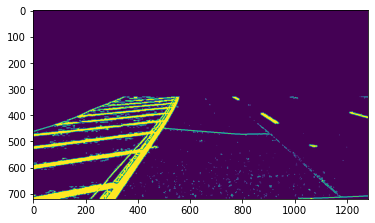

medianblur mask


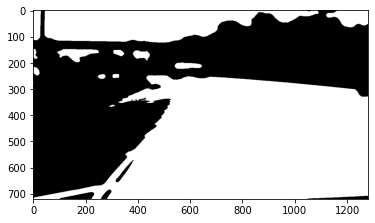

binary after masked


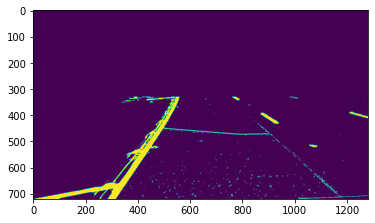

hough transform


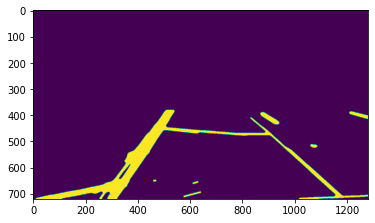

after merged


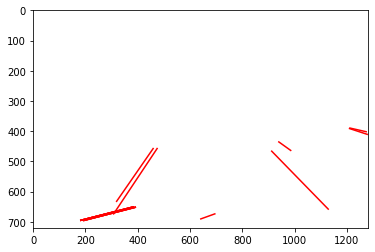

after extrapolate


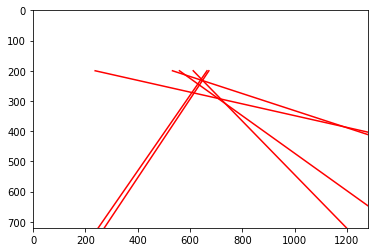

afer close line


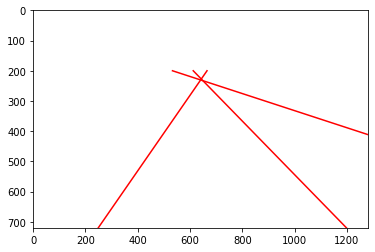

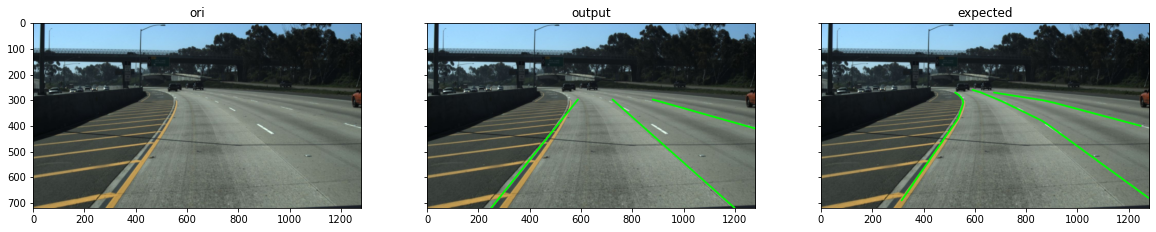

In [154]:
test_ = [398] # 84 (clean mulitple lanes), 10 (middle lane), 103 (dark), 398 (turn left with noise), 86 (turn right), 85 (nearby car) 321

for n in test_:

    file_path = json_0313[n]["raw_file"]
    img_path = f"train_set/{file_path}"
    nth_img = plt.imread(img_path)
    plt.imshow(nth_img)
    nth_data = json_0313[n]
    nth_data_h_smaples = nth_data["h_samples"]
    nth_data_lanes = nth_data["lanes"]
    expected = display_expected(nth_img, nth_data_h_smaples, nth_data_lanes)

    res = final_pipline(nth_img, is_demo=True)

    display_three(nth_img, res, expected, t1="ori", t2="output", t3="expected")

discussion of performance
    
    
	Evaluation and Results
		
        Edge cases includes,  shadow on lanes such as tree or driving under tunnel, turning, nearby vehicle that hiding the lane
        
		perform well
			
				1) straight lanes with nearby car reasonably distant
				
		potential improvement 
				
				1) Curve line is approximated by straight line
				2) not all lanes are detected
					a) if there is close nearby car, shadow on the lane
                

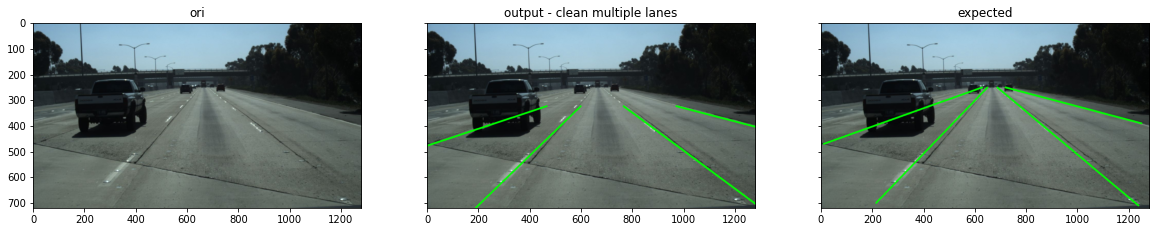

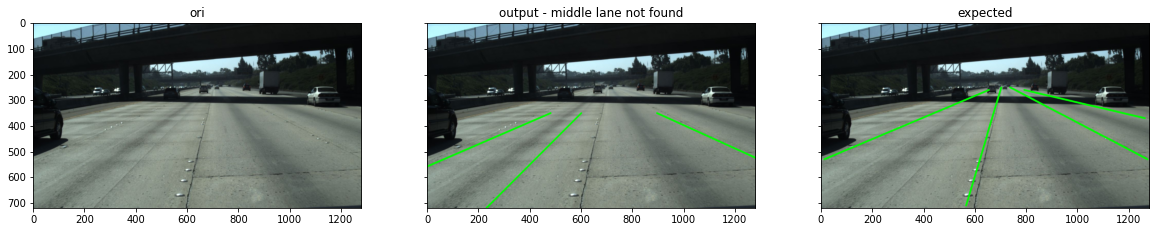

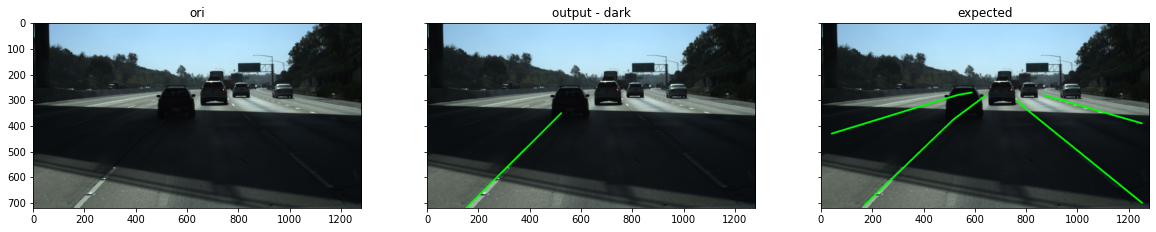

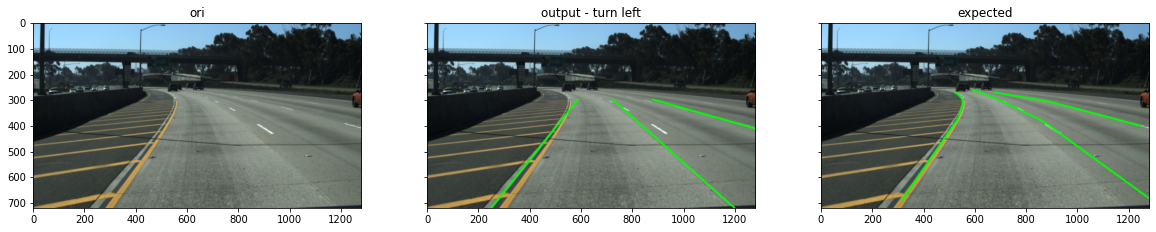

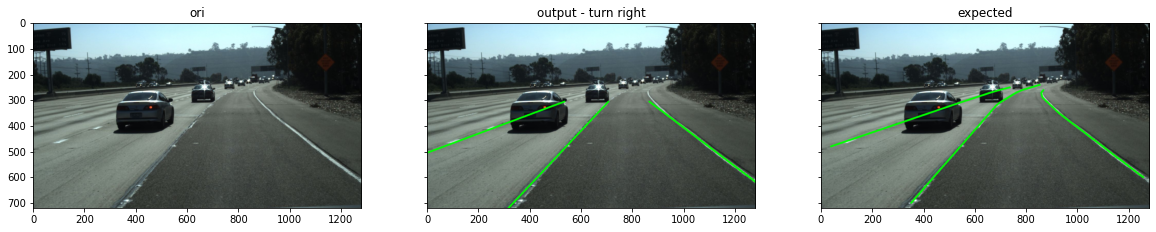

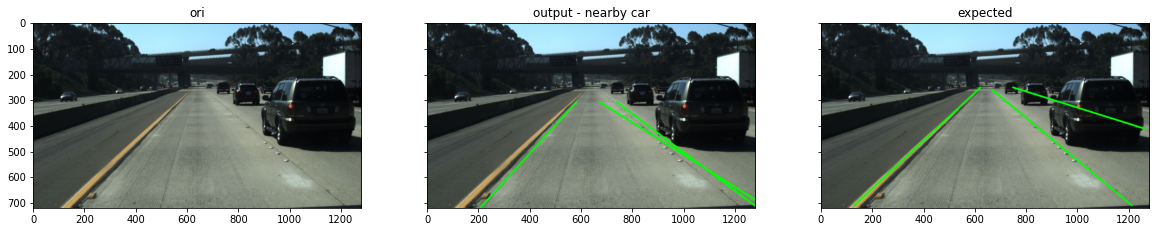

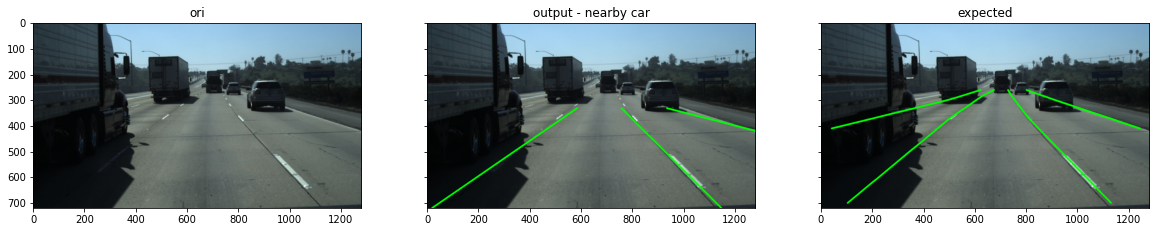

In [174]:
test_ = [84, 10, 98, 398, 86, 85, 986] # 84 (clean mulitple lanes), 10 (middle lane), 98 (dark), 398 (turn left with noise), 86 (turn right), 85 (nearby car) , 982(car nearly)
test_desibe = ["clean multiple lanes", "middle lane not found", "dark", "turn left", "turn right", "nearby car", "nearby car"]
c = 0
for n in test_:
    
    file_path = json_0313[n]["raw_file"]
    img_path = f"train_set/{file_path}"
    nth_img = plt.imread(img_path)

    nth_data = json_0313[n]
    nth_data_h_smaples = nth_data["h_samples"]
    nth_data_lanes = nth_data["lanes"]
    expected = display_expected(nth_img, nth_data_h_smaples, nth_data_lanes)

    res = final_pipline(nth_img, is_demo=False)

    display_three(nth_img, res, expected, t1="ori", t2="output - " + test_desibe[c], t3="expected")
    
    c += 1

## evulation

In [179]:
def output_json(output_lanes):
    h_sample = [240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340,
                350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450,
                460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560,
                570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670,
                680, 690, 700, 710]#, "raw_file": "clips/0313-1/6040/20.jpg"}
    lanes = []
     
    for l in output_lanes:
        
        lane_current = []
        
        for h in h_sample:
            x1, y1, x2, y2 = l
             
            slope = (y2 - y1) / (x2 - x1 + 0.001) 
            intercept = y2 - slope * x2 

            x_expected = (h - intercept) / (slope + 0.0001)
            
            if x1 < 0:
                x1 = 0
            if x1 > 1280:
                x1 = 1280
            if x2 < 0:
                x2 = 0
            if x2 > 1280:
                x2 = 1280
            
            if (x_expected >= x1 and x_expected <= x2) or (x_expected <= x1 and x_expected >= x2):
                lane_current.append(int(x_expected))
            else:
                lane_current.append(-2)
        lanes.append(lane_current) 
        
    return lanes

In [187]:
%%time
import random
random.seed(0)
randomlist = random.sample(range(1, 1000), 100)

Wall time: 0 ns


In [192]:
%%time
from evaluate.lane import LaneEval

test_ = randomlist # 84 (clean mulitple lanes), 10 (middle lane), 103 (dark), 398 (turn left with noise), 86 (turn right), 85 (nearby car) 321
def mean_(score):
    return sum(score) / len(score)
    
def evaluate_lane(test_, json_0313):
    acu_scores = []
    fps = []
    fns = []
    for n in test_:

        file_path = json_0313[n]["raw_file"]
        img_path = f"train_set/{file_path}"
        nth_img = plt.imread(img_path)

        nth_data = json_0313[n]
        nth_data_h_smaples = nth_data["h_samples"]
        nth_data_lanes = nth_data["lanes"]

        lines = final_pipline(nth_img, is_line=True)
        lines = output_json(lines)
        res = {"lanes":np.array(lines), "raw_files":file_path, "run_time":[0.1]}
        json_pred = res
        json_gt = nth_data

        pred, gt = json_pred, json_gt
        pred_lanes = pred['lanes']
        run_time = pred['run_time']
        gt_lanes = gt['lanes']
        y_samples = gt['h_samples']
        raw_file = gt['raw_file']

        
        np.random.shuffle(pred_lanes)
        # Overall Accuracy, False Positive Rate, False Negative Rate
        measures = LaneEval.bench(pred_lanes, gt_lanes, y_samples, run_time)
        acu_scores.append(measures[0])
        fps.append(measures[1])
        fns.append(measures[2])
    return mean_(acu_scores), mean_(fps), mean_(fns)

avg_result = evaluate_lane(test_, json_0313)

Wall time: 5min 44s


In [203]:
def f1_score(fp, fn):
    tp = 1 - fn
    tn = 1 - fp
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    f1 = 2 * (precision * recall) / (precision + recall)
    return  f1
print(avg_result)
print(f1_score(avg_result[1], avg_result[2]))
#print (LaneEval.bench(pred_lanes, gt_lanes, y_samples, run_time))

(0.6551041666666667, 0.45163784822286274, 0.5625)
0.46317424682541


## make videos

In [111]:
# import os
# #from tqdm import tqdm
# import cv2 
# import numpy as np 
# import matplotlib.pyplot as plt

# plt.ioff()


# out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'XVID'), 30, (1280,720))

# for clips in sorted(os.listdir('./test_set/clips/')):
#     for folders in sorted(os.listdir('./test_set/clips/'+clips)):
#         for files in range(1,21):
            
#             frame_original = cv2.imread('./test_set/clips/'+clips+'/'+folders+'/'+str(files)+'.jpg')
#             res = final_pipline(frame_original)
#             res = cv.cvtColor(res, cv.COLOR_BGR2RGB)
#             out.write(res)  
            
# out.release()

## trial

In [112]:
# gray = cv2.cvtColor(km_res, cv.COLOR_RGB2GRAY)

# gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
# gray_mean = 30 #gray_r.mean() - 50

# for i in range(gray_r.shape[0]):
#     if gray_r[i] > gray_mean:
#         gray_r[i] = 1
#     else:
#         gray_r[i] = 0
# gray = gray_r.reshape(gray.shape[0],gray.shape[1])
# plt.imshow(gray, cmap="gray")

In [113]:
# import scipy.ndimage as ndimage
# # defining the sobel filters
# sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
# print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
# sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])


# out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
# out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# # here mode determines how the input array is extended when the filter overlaps a border.
# kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
# out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
# plt.imshow(out_l, cmap='gray')